### Import library

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 200
pd.set_option('display.float_format', '{:.2f}'.format)


### Import dataset

In [114]:
survey_2023 = pd.read_csv("./data/stack-overflow-developer-survey-2023/survey_results_public.csv")
survey_2022 = pd.read_csv("./data/stack-overflow-developer-survey-2022/survey_results_public.csv")
survey_2021 = pd.read_csv("./data/stack-overflow-developer-survey-2021/survey_results_public.csv")
survey_2023.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Bootstrapping a business;Professional development or self-paced learning from online courses,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;Colleague;Friend or family member;Hackathons (virtual or in-person);Online Courses or Certification;On the job training;Other online resources (e.g., videos, blogs, forum);S...",Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Books;Recorded coding sessions;How-to videos;Video-based Online Courses;Written-based Online Courses;Auditory mate...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testing;Observability tools,"Information Services, IT, Software Development, or other Technology",Appropriate in length,Easy,285000.00
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced learning from online courses,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;Colleague;On the job training;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)","Formal documentation provided by the owner of the tech;Blogs with tips and tricks;How-to videos;Online challenges (e.g., daily or weekly coding challenges);Written Tutorials;Click to write Choice ...",...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testing;Observability tools;Innersource initiative;Developer portal or other central places to find tools/services;Continuous integration (CI) and (more oft...,"Information Services, IT, Software Development, or other Technology",Appropriate in length,Easy,250000.00
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Colleague;Friend or family member;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)","Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Auditory material (e.g., podcasts);Written Tutorials;Stack Overflow;Interactive tutorial",...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) and (more often) continuous delivery,NaN,Appropriate in length,Easy,156000.00
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, freelancer, or self-employed",Remote,Hobby;Contribute to open-source projects;Professional development or self-paced learning from online courses,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;Online Courses or Certification;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)","Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Books;How-to videos;Video-based Online Courses;Online challenges (e.g., daily or weekly coding challenges);Written...",...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability tools;Continuous integration (CI) and (more often) continuous delivery,Other,Appropriate in length,Neither easy nor difficult,23456.00


In [115]:
schema = pd.read_csv("./data/stack-overflow-developer-survey-2023/survey_results_schema.csv")
schema.head(10)

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hello world! </strong></span></div>\n\n<div> </div>\n\n<div>Thank you for taking the 2023 Stack Overflow Developer Survey, the longest running survey of ...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID310,Q310,"<div><span style=""font-size:19px;""><strong>You consent to providing your information to help us stay privacy compliant</strong></span></div>\n\n<div> </div>\n\n<div>Your participation in this surv...",False,DB,TB
3,QID312,Q120,,True,MC,SAVR
4,QID1,S1,"<span style=""font-size:22px; font-family: arial,helvetica,sans-serif; font-weight: 700;"">Basic Information</span><br>\n<br>\n<p><span style=""font-size:16px; font-family:arial,helvetica,sans-serif;...",False,DB,TB
5,QID2,MainBranch,"Which of the following options best describes you today? For the purpose of this survey, a developer is ""someone who writes code"". *",True,MC,SAVR
6,QID127,Age,What is your age? *,True,MC,MAVR
7,QID296,Employment,Which of the following best describes your current employment status? Select all that apply.,False,MC,MAVR
8,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
9,QID297,CodingActivities,Which of the following best describes the code you write outside of work? Select all that apply.,False,MC,MAVR


In the schema dataset, there is a lot of dummy data that doesn't have true column names in "qname" column or correct meanings. Therefore, we must clean it later to ensure in "qname" and "question" column has a meaningful name and accurate representation in our dataset.

### Meaning of each columns

Because the dataset varies by year, each year may include unique columns based on trends (for example, in 2022, we had questions related to Blockchain, and in 2023, we had questions related to AI). As a result, the columns in the dataset from 2021 to 2023 differ in number. To address this, we identify 'ambiguous_columns,' which are the common columns across all three datasets, and use them to filter and combine the datasets into one for further analysis.

In [116]:
# Define ambiguous columns
ambiguous_cols = set(survey_2023.columns).intersection(set(survey_2022.columns))
ambiguous_cols = ambiguous_cols.intersection(set(survey_2021.columns))

# Cleaning schema dataset
schema_name = pd.DataFrame(ambiguous_cols, columns=['qname'])
schema = schema.loc[:, ['qname', 'question']]

# Join the columns in our dataset with the schema to obtain the final definitions of those columns.
schema_df = schema_name.merge(schema, 'left', 'qname')
schema_df

,qname,question
0,SurveyLength,How do you feel about the length of the survey this year?
1,SOAccount,Do you have a Stack Overflow account?
2,DatabaseWantToWorkWith,NaN
3,EdLevel,Which of the following best describes the highest level of formal education that you’ve completed? *
4,MiscTechHaveWorkedWith,NaN
5,MainBranch,"Which of the following options best describes you today? For the purpose of this survey, a developer is ""someone who writes code"". *"
6,SOVisitFreq,How frequently would you say you visit Stack Overflow?
7,CompTotal,"What is your current total <b>annual</b> compensation (salary, bonuses, and perks, before taxes and deductions)? Please enter a whole number in the box below, without any punctuation. If you are ..."
8,Currency,"Which currency do you use day-to-day? If your answer is complicated, please pick the one you're most comfortable estimating in. *"
9,LanguageWantToWorkWith,NaN


### Data survey in 3 year

In [117]:
# Union the dataset from 2021 to 2023 into one final dataset
survey_2023_df = survey_2023.loc[:, list(ambiguous_cols)]
survey_2022_df = survey_2022.loc[:, list(ambiguous_cols)]
survey_2021_df = survey_2021.loc[:, list(ambiguous_cols)]

# Adding column "Year" to define when question have been reply
survey_2023_df['Year'] = 2023
survey_2022_df['Year'] = 2022
survey_2021_df['Year'] = 2021

# Concat data from 3 year into 1 final dataset for analysis
df = pd.concat([survey_2021_df, survey_2022_df, survey_2023_df], ignore_index=True)
df.shape

(245891, 36)

#### Processing for Salary columns

The data from the Stack Overflow Developer Survey after 2020 differs significantly from previous data. Before 2020, all salary data was recorded in USD, but after that, salaries are recorded in different currencies. If we don't clean this data, it will lead to large discrepancies between data points. For example, a salary of 250 million VND in Vietnam (corresponding to 10000 USD) will appear vastly different when compared to salaries in the US, leading to misleading analysis.

Its seems like we already have column converted to USD, "ConvertedCompYearly", but it still has missing values even through we have "TotalComp" and "Currency". Therefore, we need to process it again to obtain more complete data.

In [118]:
len_data = df.shape[0]
print("Percent null of ConvertedCompYearly: ", df['ConvertedCompYearly'].isna().sum()/ len_data)
print("Percent null of Currency: ", df['Currency'].isna().sum()/ len_data)
print("Percent null of CompTotal: ", df['CompTotal'].isna().sum()/ len_data)

Percent null of ConvertedCompYearly:  0.4593783424362827
Percent null of Currency:  0.27741153600579116
Percent null of CompTotal:  0.4557344514439325


In [119]:

# Using regex to extract currency code from Currency column
df['currency_code'] = df['Currency'].str.extract(r'^(\w{3})')
df['currency_code'].unique()

array(['EUR', nan, 'GBP', 'INR', 'SEK', 'TRY', 'CAD', 'SGD', 'CHF', 'RUB',
       'ILS', 'USD', 'BRL', 'BGN', 'AED', 'PLN', 'UZS', 'HUF', 'PKR',
       'ZMW', 'NGN', 'ALL', 'BDT', 'IRR', 'RON', 'HRK', 'GEL', 'DKK',
       'AMD', 'LBP', 'BHD', 'EGP', 'AUD', 'CLP', 'IDR', 'RSD', 'KRW',
       'HKD', 'NPR', 'UAH', 'JPY', 'TZS', 'PEN', 'BOB', 'CZK', 'ZAR',
       'ARS', 'NOK', 'VND', 'MYR', 'MGA', 'KES', 'LKR', 'TND', 'BYN',
       'COP', 'MKD', 'BWP', 'DZD', 'BAM', 'CNY', 'MXN', 'MAD', 'JOD',
       'DOP', 'THB', 'ETB', 'XOF', 'PYG', 'ISK', 'HTG', 'TWD', 'GTQ',
       'XAF', 'KZT', 'LYD', 'CUP', 'SYP', 'PHP', 'XCD', 'LAK', 'YER',
       'TOP', 'IQD', 'CRC', 'MRU', 'AZN', 'SAR', 'AOA', 'SDG', 'GYD',
       'XPF', 'NZD', 'UYU', 'HNL', 'NIO', 'MZN', 'TTD', 'GHS', 'BBD',
       'FJD', 'VES', 'UGX', 'KWD', 'GMD', 'LSL', 'MMK', 'KGS', 'AFN',
       'MUR', 'SZL', 'RWF', 'MDL', 'TMT', 'KYD', 'KHR', 'IMP', 'QAR',
       'BZD', 'ANG', 'MNT', 'TJS', 'OMR', 'BIF', 'JMD', 'NAD', 'GNF',
       'non', '

Based on list of "currency_code" I generate currency_exchange dataset

This datasets uses the "GOOGLEFINANCE" function in Google Sheets to convert a list of "currency_code" into USD

In [120]:
currency_exchange = pd.read_csv("./data/currency_exchange.csv")
currency_exchange.head()

,currency_code,to_USD
0,EUR,1.09
1,GBP,1.27
2,INR,0.01
3,SEK,0.10
4,TRY,0.03


In [121]:
# Join with currency_exchange dataset to have the true salary in USD currency
survey_df = df.merge(currency_exchange, 'left', 'currency_code')
survey_df['Salary'] = survey_df['to_USD'] * survey_df['CompTotal']


survey_df[['Currency', 'currency_code', 'to_USD', 'CompTotal', 'Salary', 'ConvertedCompYearly']]

,Currency,currency_code,to_USD,CompTotal,Salary,ConvertedCompYearly
0,EUR European Euro,EUR,1.09,4800.00,5244.60,62268.00
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,EUR European Euro,EUR,1.09,NaN,NaN,NaN
4,GBP\tPound sterling,GBP,1.27,NaN,NaN,NaN
...,...,...,...,...,...,...
245886,BRL\tBrazilian real,BRL,0.18,200000.00,35353.18,NaN
245887,NaN,NaN,NaN,NaN,NaN,NaN
245888,NaN,NaN,NaN,NaN,NaN,NaN
245889,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
len_data = survey_df.shape[0]
print("Percent null of Currency: ", survey_df['Currency'].isna().sum()/ len_data)
print("Percent null of CompTotal: ", survey_df['CompTotal'].isna().sum()/ len_data)
print("Percent null of Salary: ", survey_df['Salary'].isna().sum()/ len_data)
print("Percent null of ConvertedCompYearly: ", survey_df['ConvertedCompYearly'].isna().sum()/ len_data)

Percent null of Currency:  0.27741153600579116
Percent null of CompTotal:  0.4557344514439325
Percent null of Salary:  0.4557344514439325
Percent null of ConvertedCompYearly:  0.4593783424362827


Note: Because I have already customized the table view by rounding to 2 decimal places, there might be slight discrepancies when multiplying 'to_USD' by 'Comp_Total' to calculate 'Salary'.

In [123]:
# Filter out abnormal value. I using the people have highest salaries is TimCook is about 265 milion
print(survey_df.shape)
survey_df = survey_df[(survey_df['Salary'] < 265000000) & (survey_df['Salary'] < 265000000)]
survey_df.shape


(245891, 39)


(133803, 39)


### Question 1: Is there a relationship between "Country", "EdLevel", "OrgSize", "YearsCode" with "Salary"

### Question 1: How does educational level affect to your salary?

In [124]:
# Filter to just keep data we need for answer this question
q1_df = survey_df[["EdLevel", "Salary", "Year", "Country", "CompTotal"]]
q1_df.head()


,EdLevel,Salary,Year,Country,CompTotal
0,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",5244.60,2021,Slovakia,4800.00
9,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4027.56,2021,Sweden,42000.00
11,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",46982.88,2021,Spain,43000.00
12,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",78122.69,2021,Germany,71500.00
16,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",267.80,2021,Turkey,9000.00


Text(0.5, 0, 'Education Level')

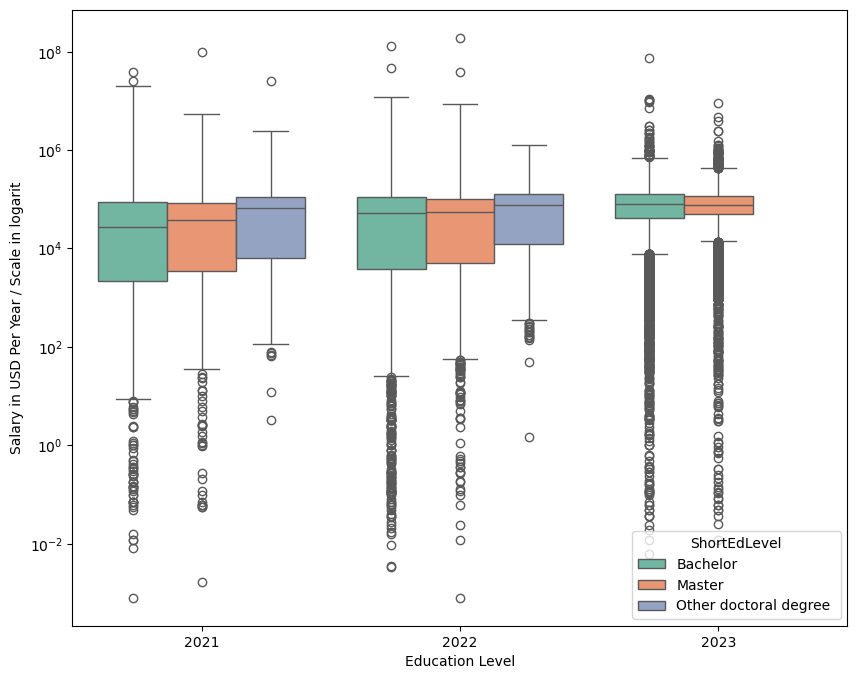

In [125]:
# Remove row have null in "Salary" column
q1_df = q1_df.dropna(subset=['Salary'])

# Filter just keep degree I want to analysis
q1_df["ShortEdLevel"] = q1_df["EdLevel"].str.extract(r'([\w\s\']*)')
education_list = ['Bachelor', 'Master', 'Other doctoral degree ']
q1_df = q1_df[q1_df['ShortEdLevel'].isin(education_list)]

# Visualize
plt.figure(figsize=(10,8))
s = sns.boxplot(data=q1_df, x="Year", y="Salary", hue="ShortEdLevel", hue_order=education_list, log_scale=True, palette="Set2")
plt.ylabel("Salary in USD Per Year / Scale in logarit")
plt.xlabel("Education Level")



Its quite challenging us to capture meaningful information in this case because the salary gap between people in developed and developing countries is significanly high. Therefore, in this case we just analysis in one Country is better

#### Analysis for US

Because we will using "Salary" as the main feature in this analysis, if the "Salary" column doesn't have any meaningful values, it will be excluded from our analysis

By the way, in the 'EdLevel' column, there are many types of educational levels. To better understand this analysis, we'll focus only on 'Bachelor,' 'Master,' and 'Other doctoral degree' categories.

Text(0.5, 0, 'Education Level')

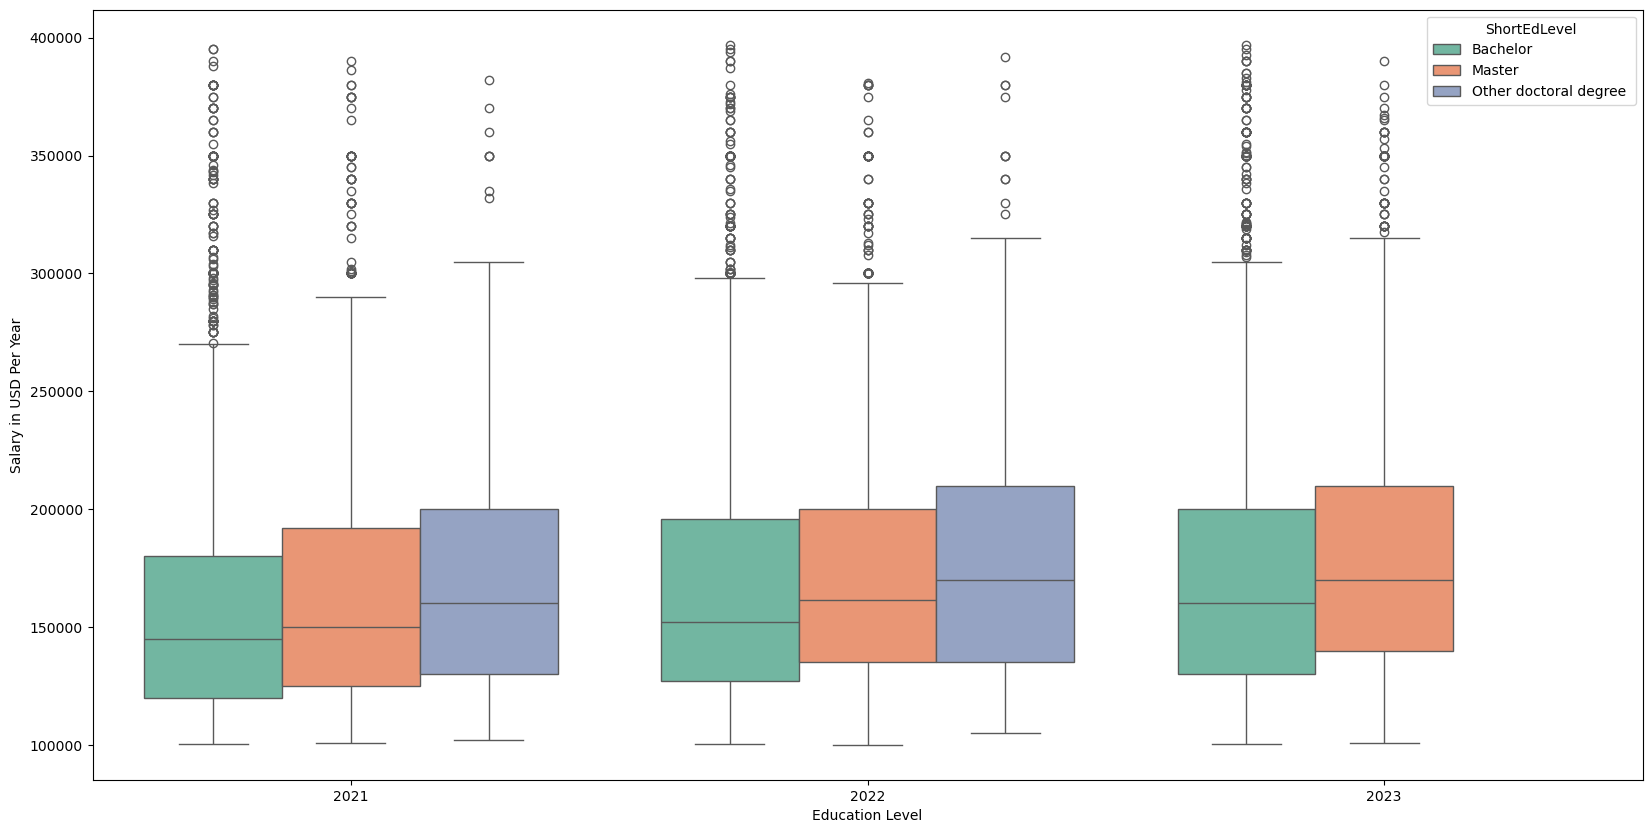

In [126]:
# Filter data from US
us_df = q1_df[q1_df['Country'] == 'United States of America']
us_detail_df = us_df[(us_df['Salary'] > 100000) & (us_df['Salary'] < 400000)]

# Visualize
plt.figure(figsize=(20,10))
s = sns.boxplot(data=us_detail_df, x="Year", y="Salary", hue="ShortEdLevel", hue_order=education_list,  palette="Set2")

plt.ylabel("Salary in USD Per Year")
plt.xlabel("Education Level")


**Education Level and Salary:**

Generally, individuals with higher education levels, such as a doctorate, tend to earn higher salaries compared to those with lower education levels, such as a bachelor's degree. This indicates that education level is a significant factor influencing salary in this industry.

**Salary Distribution Among Different Education Levels:**

Despite the general trend, there are many individuals with only a bachelor's degree who earn salaries comparable to or even exceeding those of individuals with a doctorate. This suggests that other factors, beyond education, can significantly influence salary.

**Salary Range:**

Most salaries fall within the range of $125k to $200k USD per year. This range is notably higher than the average salary in the US, often being 2-3 times greater. This higher earning potential makes the field more attractive to prospective professionals, despite the substantial time and effort required to gain the necessary technical skills.

### Question 2: Relation between Salary and Experience?

In [127]:
# Filter to just keep data we need for our analysis
q2_df = survey_df[["Country", "Salary", "YearsCodePro", "Year"]].dropna(subset=["Salary", "YearsCodePro"])
# Filter to just analysis top 5 data
# Get the list of top 5 Country do survey amost
top5_country = q2_df['Country'].value_counts().head(5).reset_index()['Country'].to_list()
# Filter data come from top 5 Country
top5_df = q2_df[q2_df['Country'].isin(top5_country)]
top5_df.head()

,Country,Salary,YearsCodePro,Year
12,Germany,78122.69,6,2021
17,Canada,44357.68,6,2021
24,Germany,78669.00,18,2021
27,United Kingdom of Great Britain and Northern Ireland,67366.18,21,2021
35,Germany,61187.00,10,2021


In [128]:
# Check data type of "YearsCodePro" column
top5_df['YearsCodePro'].dtypes

dtype('O')

In [129]:
# Convert text into number for further visualization
top5_df.loc[top5_df['YearsCodePro'] == 'Less than 1 year', 'YearsCodePro'] = 0
top5_df.loc[top5_df['YearsCodePro'] == 'More than 50 years', 'YearsCodePro'] = 50
top5_df.loc[:, 'YearsCodePro'] = pd.to_numeric(top5_df['YearsCodePro'])
top5_df['YearsCodePro'].dtypes

dtype('O')

In [130]:
# Calculate statistic 
def percentile_25(a):
    return a.quantile(0.25)
def percentile_75(a):
    return a.quantile(0.75)
top5_statistic = top5_df.groupby(["Country", "YearsCodePro"])['Salary'].agg(['mean', 'median', percentile_25, percentile_75])
top5_statistic = top5_statistic.reset_index().sort_values(['Country', 'YearsCodePro'])
top5_statistic

,Country,YearsCodePro,mean,median,percentile_25,percentile_75
0,Canada,0,508091.01,43630.50,29087.00,55583.44
1,Canada,1,83357.48,47266.38,36358.75,58174.00
2,Canada,2,82013.84,58174.00,44975.77,69245.24
3,Canada,3,67002.85,61809.88,50902.25,77444.14
4,Canada,4,75805.39,65809.34,54538.12,87261.00
...,...,...,...,...,...,...
229,United States of America,46,192663.64,130000.00,99250.00,176750.00
230,United States of America,47,154411.76,141000.00,76000.00,194000.00
231,United States of America,48,174968.25,149304.50,130000.00,208500.00
232,United States of America,49,207438.48,105000.00,48375.00,185000.00


Text(0.5, 0, 'Year of experience')

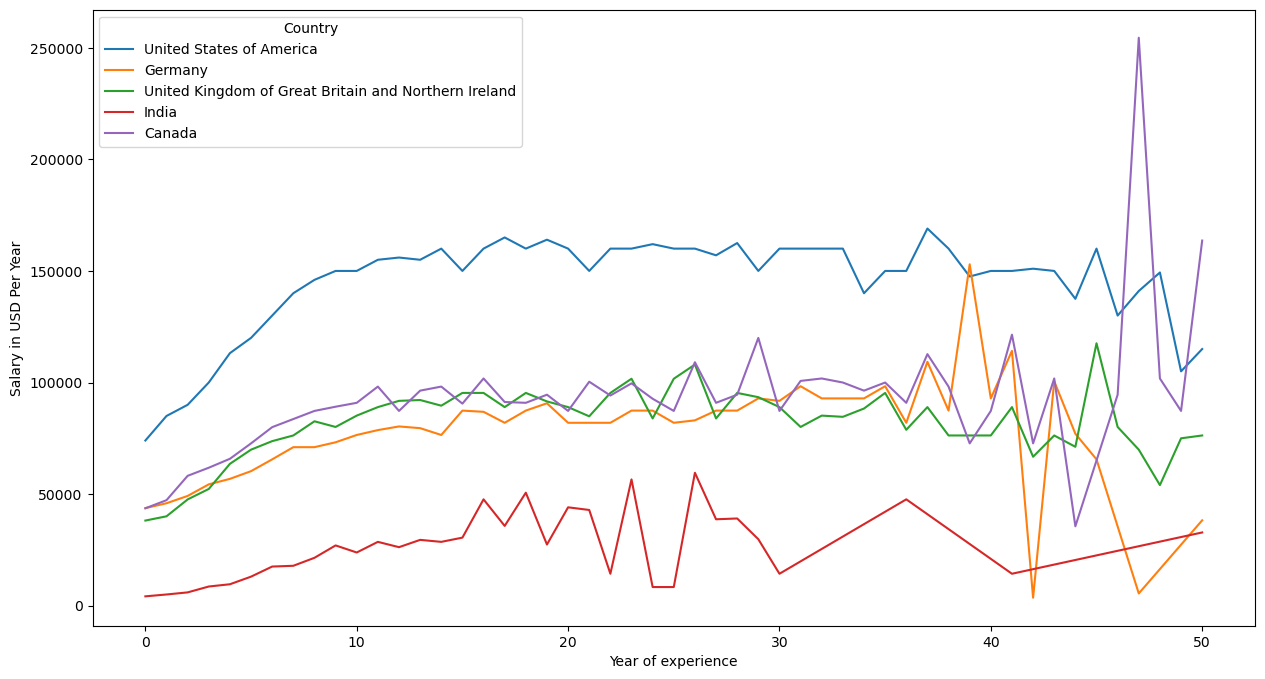

In [131]:
# Visualize
plt.figure(figsize=(15,8))
sns.lineplot(data=top5_statistic, x="YearsCodePro", y="median", hue="Country", hue_order=top5_country)
plt.ylabel("Salary in USD Per Year")
plt.xlabel("Year of experience")

**Experience and Salary Growth:** Initially, salaries are relatively low for individuals with no experience. However, salaries increase significantly with additional years of experience. By the time individuals reach around 15 years of experience, their salaries are notably higher.

**Experience Plateau:** After approximately 15 years of experience, the salary growth tends to stabilize, showing minimal variation from year to year.

**Country-Specific Salary Differences:**
- United States: Offers the highest salaries compared to other countries.
- India: Provides the lowest salaries among the countries analyzed.
- Germany, UK, and Canada: Salaries in these countries are somewhat similar, though still higher than those in India.

**Comparative Salary Gaps:**

- The salary gap between the US and India is substantial, with US salaries being more than three times higher than those in India.
- Salaries in the US and other countries analyzed are also approximately twice as high as those in India.

### Question 3: Affect of Programming Language with Salary

In [132]:
# Filter to just keep data need for question
q3_df = survey_df[["LanguageHaveWorkedWith", "Salary", "Year", "Country", "Age"]].dropna(subset=["Salary"])
q3_df.head(3)

,LanguageHaveWorkedWith,Salary,Year,Country,Age
0,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,5244.60,2021,Slovakia,25-34 years old
9,C++;Python,4027.56,2021,Sweden,25-34 years old
11,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;TypeScript,46982.88,2021,Spain,25-34 years old


In [133]:
# Calculate number records for each country
q3_df['Country'].value_counts()

Country
United States of America                                30625
Germany                                                 10169
United Kingdom of Great Britain and Northern Ireland     9162
India                                                    8040
Canada                                                   5341
                                                        ...  
Gabon                                                       1
Guinea-Bissau                                               1
Sierra Leone                                                1
Liechtenstein                                               1
Antigua and Barbuda                                         1
Name: count, Length: 182, dtype: int64

Because it's not fair to compare the salary of developing countries with that of developed countries, I am using only records from the US for this analysis.

In [134]:
# Filter just keep data from US
us_df = q3_df[q3_df['Country'] == 'United States of America']
# Split LanguageHaveWorkedWith into individual languages
q3_df['language_split'] = q3_df['LanguageHaveWorkedWith'].str.split(pat=';')
# Explode to split each language into each rows
q3_exploded_df = q3_df.explode('language_split')
# Calculate statistic 
q3_statistic_df = q3_exploded_df.groupby("language_split")['Salary'].agg(['mean', 'median', 'count'])
q3_statistic_df = q3_statistic_df.reset_index().sort_values(by=['count'], ascending=False)
q3_statistic_df.head(5)

,language_split,mean,median,count
26,JavaScript,82357.23,54631.25,87993
23,HTML/CSS,80611.67,52446.00,71073
48,SQL,85645.65,57536.52,69194
42,Python,96325.95,61635.43,58176
52,TypeScript,89101.55,60095.42,52556


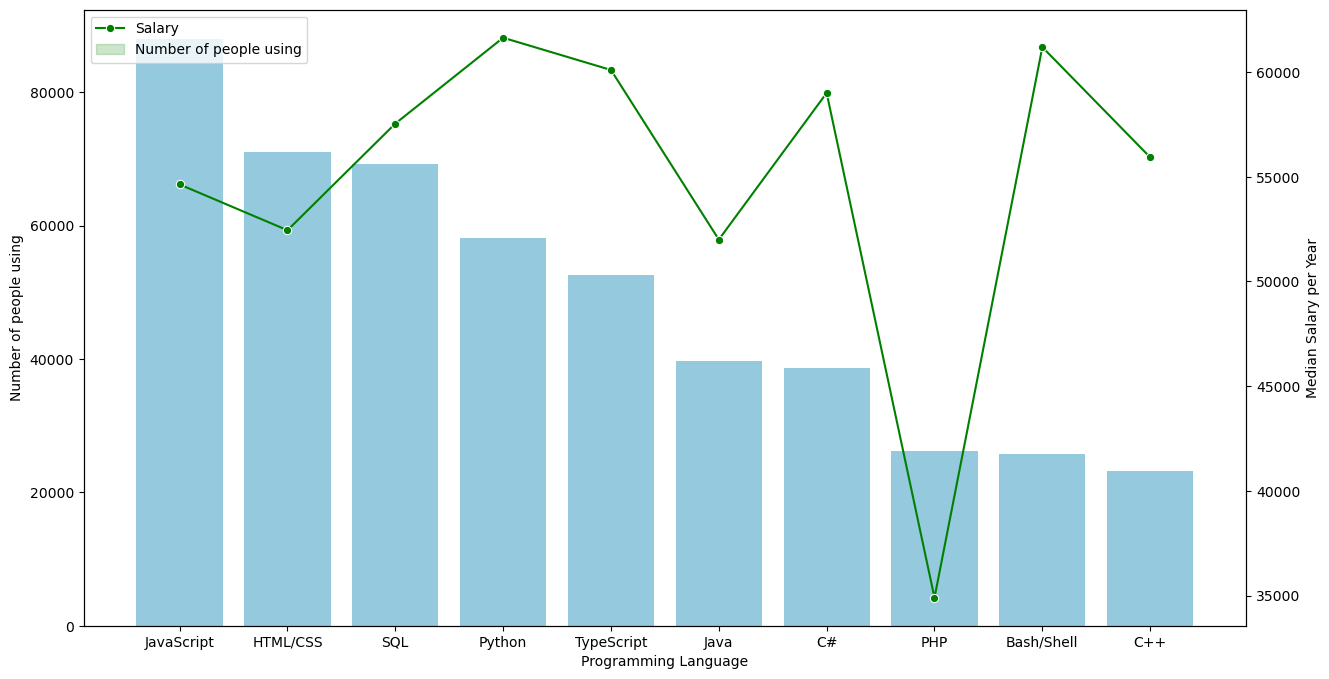

In [135]:
# Filter data to just visualize top 10
q3_visualize_df = q3_statistic_df.iloc[:10, :]

# Visualize Configuration
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot()
# Visualize bar chart
sns.barplot(q3_visualize_df, x='language_split', y='count', color="skyblue", ax=ax1)
ax1.set_ylabel("Number of people using")
ax1.set_xlabel("Programming Language")

# Visualize line chart
ax2 = ax1.twinx()
sns.lineplot(q3_visualize_df, x='language_split', y='median', color="g", marker='o', ax=ax2)
ax2.set_ylabel("Median Salary per Year")
plt.legend(labels=['Salary', 'Number of people using'])

**Popularity vs. Salary:**

JavaScript is the most popular programming language, as indicated by the highest bar on the chart. However, despite its popularity, the average salary for JavaScript developers is relatively modest, around $53,000 per year. This suggests that while JavaScript is widely used, it does not command the highest salaries in the market.

**High Salaries for Less Popular Languages:**
- Python: Python is among the top languages with high salaries, reflecting its demand and specialized skill set.
- Bash/Shell: Bash/Shell scripting, despite its lower usage compared to JavaScript (with about 1/3 of the usage), commands a significantly higher average salary. This indicates that specialized skills in scripting are highly valued in the market, despite the smaller number of users.

**PHP Salary Insights:** Although PHP has a moderate number of users, its average salary is notably high. This could suggest that PHP skills are rare or that there is high demand for PHP developers, which drives up salaries despite the language's relatively lower usage compared to JavaScript.


**Conclusion:**
The chart highlights that higher popularity does not always correlate with higher salaries. While JavaScript is extensively used, it does not offer the highest salaries. Conversely, less popular languages like Python and Bash/Shell offer competitive salaries, indicating a potential market premium for specialized skills. PHP also shows that even languages with moderate usage can command high salaries, possibly due to specific industry demands or skill scarcity.


#### Deep dive more into Programming Language Python

In [136]:
q3_python = q3_exploded_df[q3_exploded_df['language_split'] == 'Python']
# Calculate statistic 
q3_python_statistic_df = q3_python.groupby("Age")['Salary'].agg(['mean', 'median', 'count'])
q3_python_statistic_df = q3_python_statistic_df.reset_index().sort_values(by=['median'], ascending=True)
q3_python_statistic_df['Median_total'] = q3_statistic_df[q3_statistic_df['language_split'] == 'Python']['median'].values[0]
q3_python_statistic_df.head(5)


,Age,mean,median,count,Median_total
7,Under 18 years old,36477.12,987.03,132,61635.43
0,18-24 years old,61970.60,15252.72,9113,61635.43
1,25-34 years old,79216.82,56880.33,28835,61635.43
6,Prefer not to say,2419615.74,77874.32,82,61635.43
2,35-44 years old,112976.92,85000.00,13828,61635.43


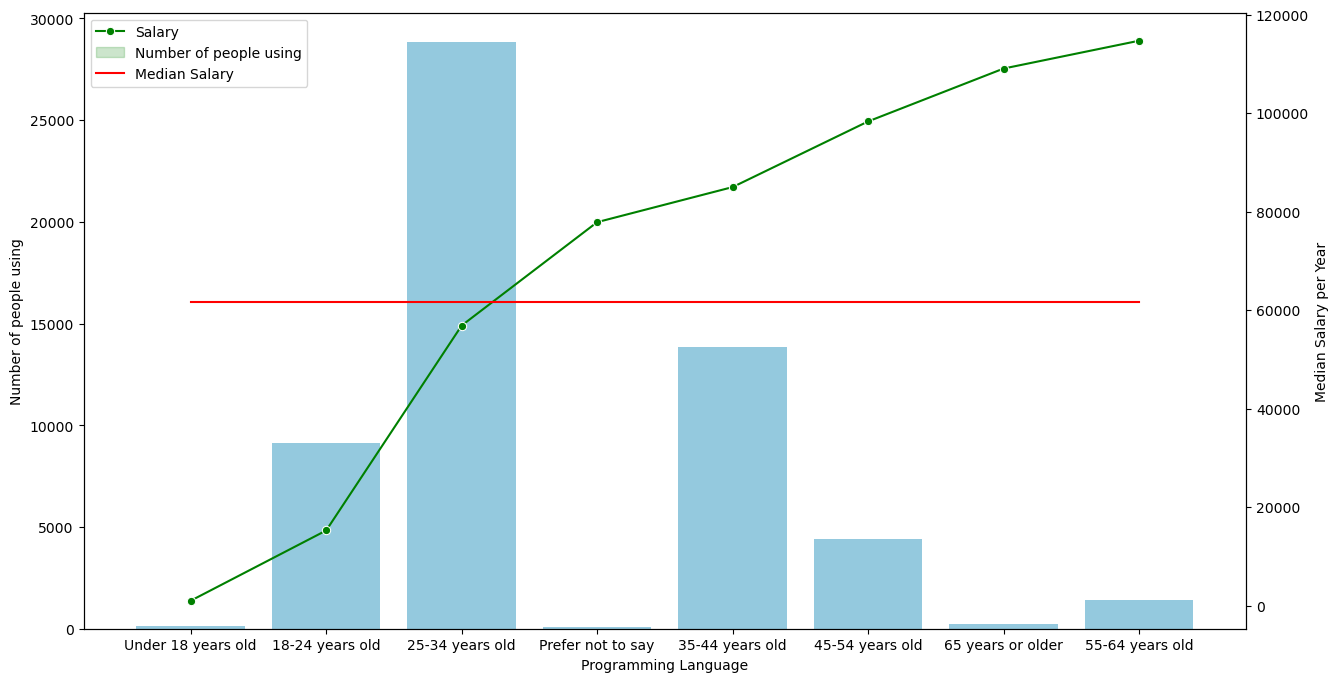

In [137]:
# Visualize Configuration
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot()
# Visualize bar chart
sns.barplot(q3_python_statistic_df, x='Age', y='count', color="skyblue", ax=ax1)
ax1.set_ylabel("Number of people using")
ax1.set_xlabel("Programming Language")

# Visualize line chart
ax2 = ax1.twinx()
sns.lineplot(q3_python_statistic_df, x='Age', y='median', color="g", marker='o', ax=ax2)
sns.lineplot(q3_python_statistic_df, x='Age', y='Median_total', color="r", ax=ax2)
ax2.set_ylabel("Median Salary per Year")
plt.legend(labels=['Salary', 'Number of people using', 'Median Salary'])

- **Experience and Salary Relationship:**
The chart clearly demonstrates a positive correlation between years of experience and salary. As experience increases, so does the average salary. This trend is consistent across different programming languages, indicating that experience is a key factor in earning potential.

- **Age Distribution and Programming Language Popularity:**
Python: The majority of Python users are between the ages of 25 and 35. This age group suggests that Python is popular among relatively younger professionals. This demographic trend could reflect Python's growing adoption and its appeal to newer entrants in the tech field.

- **Age and Salary Comparison:**
For individuals aged 25 to 34, the average salary aligns closely with the median market salary. This indicates that this age group is earning an average salary that reflects broader industry norms. It also suggests that while younger professionals might start with salaries around the market median, their earning potential increases with experience.

**Conclusion**

The chart underscores the significant impact of experience on salary, reinforcing the value of gaining experience in the tech industry. Python’s popularity among younger professionals aligns with its increasing adoption, while the age-related salary data shows that younger workers are earning in line with the market median. This insight can be valuable for understanding industry trends and career planning in tech.